In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [2]:
df = pd.read_csv(r"C:\Users\DHONI HANIF\OneDrive\Documents\AI Collection and Loss Reverse Forecast\data_preparation\EDA\Univariate_bivariate_multivariate\Univariate_Analysis\new_kolektor.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1000 non-null   int64  
 1   time_to_collect        1000 non-null   int64  
 2   avg_bill_methods       1000 non-null   object 
 3   debtor_volume_handled  1000 non-null   int64  
 4   bill_amount_collected  1000 non-null   int64  
 5   total_actual           1000 non-null   int64  
 6   total_cost             1000 non-null   int64  
 7   success_rate           1000 non-null   float64
dtypes: float64(1), int64(6), object(1)
memory usage: 62.6+ KB


In [3]:
for i in df.columns:
    if df[i].dtype == "object":
        df[i] = df[i].astype("category")

df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [4]:
df.head()

,time_to_collect,avg_bill_methods,debtor_volume_handled,bill_amount_collected,total_actual,total_cost,success_rate
0,0,sms or WA,7,14400000,35700000,277706,40.0
1,11,panggilan,35,79000000,160500000,22382611,49.0
2,4,sms or WA,6,7100000,26700000,205389,27.0
3,29,datang ke tempat,63,782000000,1395000000,482942548,56.0
4,22,datang ke tempat,35,346000000,485500000,151035603,71.0


In [5]:
bill_methods = {"sms or WA": 0, "surat panggilan": 1, "panggilan": 2, "datang ke tempat": 3}
columns = {"avg_bill_methods": bill_methods}
for i in df.columns:
    if df[i].dtype == "category" or df[i].dtype == "object":
        df[i] = [columns[i][j] for j in df[i]]

y = df["total_cost"]
df.drop("total_cost", axis=1, inplace=True)             
scaler = RobustScaler().fit(df[[i for i in df.columns if i not in columns]])
df2 = pd.DataFrame(scaler.transform(df[[i for i in df.columns if i not in columns]]), columns=df[[i for i in df.columns if i not in columns]].columns)
for i in columns:
    df2[i] = df[i]
df2.head(5)

,time_to_collect,debtor_volume_handled,bill_amount_collected,total_actual,success_rate,avg_bill_methods
0,-1.000000,-1.347826,-0.459398,-0.520698,-0.363636,0
1,-0.266667,-0.130435,-0.282327,-0.344973,-0.159091,2
2,-0.733333,-1.391304,-0.479408,-0.533371,-0.659091,0
3,0.933333,1.086957,1.644624,1.393270,0.000000,3
4,0.466667,-0.130435,0.449531,0.112644,0.340909,3


In [6]:
X = df2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_train.shape

((800, 6), (200, 6), (800,), (800,))

In [7]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [8]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** (1/2)
r_square = r2_score(y_test, y_pred)

print(f"""
      Mean Squared Errror : {mse:.2f}
      Mean Absolute Error : {mae:.2f}
      Mean Absolute Percentage Error : {mape:.2f}
      Root Mean Squared Error : {mape:.2f}
      R_Squared : {r_square:.2f}
      """)


      Mean Squared Errror : 11085334076219220.00
      Mean Absolute Error : 65372455.01
      Mean Absolute Percentage Error : 0.54
      Root Mean Squared Error : 0.54
      R_Squared : 0.64
      


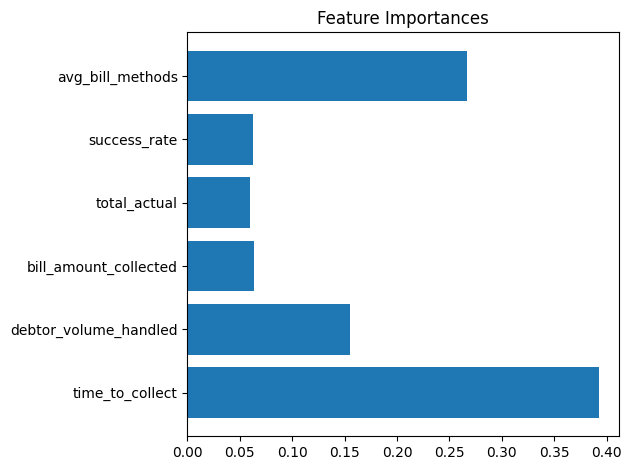

In [9]:
plt.barh(X_train.columns, model.feature_importances_)
plt.title("Feature Importances")
plt.tight_layout()
plt.show()

In [10]:
# Tentukan hyperparameter yang akan dijelajahi
param_grid = {
    'n_estimators': np.arange(100, 301, 10),
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

# Inisiasi Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Inisiasi Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Melakukan pencarian hyperparameter terbaik
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 2268 candidates, totalling 11340 fits


c:\Users\DHONI HANIF\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
5670 fits failed out of a total of 11340.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2750 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\DHONI HANIF\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\DHONI HANIF\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\DHONI HANIF\AppData\Local\Programs\Python\Python39\lib\si

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': array([100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220,
       230, 240, 250, 260, 270, 280, 290, 300])},
             verbose=2)

In [11]:
grid_search.best_score_

0.6708094025229068

In [12]:
model = grid_search.best_estimator_
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** (1/2)
r_square = r2_score(y_test, y_pred)

print(f"""
      Mean Squared Errror : {mse:.2f}
      Mean Absolute Error : {mae:.2f}
      Mean Absolute Percentage Error : {mape:.2f}
      Root Mean Squared Error : {mape:.2f}
      R_Squared : {r_square:.2f}
      """)


      Mean Squared Errror : 9858010588462884.00
      Mean Absolute Error : 63154180.70
      Mean Absolute Percentage Error : 0.60
      Root Mean Squared Error : 0.60
      R_Squared : 0.68
      


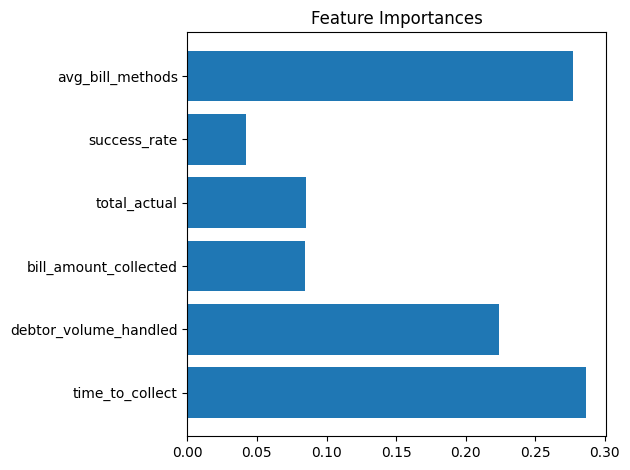

In [13]:
plt.barh(X_train.columns, model.feature_importances_)
plt.title("Feature Importances")
plt.tight_layout()
plt.show()

In [14]:
import pickle

pickle.dump(model, open("random_forest.pkl", "wb"))

In [16]:
import joblib

load_model = joblib.load('random_forest.pkl')

input_data = [x for x in X_test.iloc[-1]]
final_features = [np.array(input_data)]
result = load_model.predict(final_features)[0]
result

c:\Users\DHONI HANIF\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


213116399.26944906

In [17]:
y_test.iloc[-1]

238328672